In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline  
from PIL import Image
import numpy as np

import csv
import os

31
47775.0
218.57492994394394


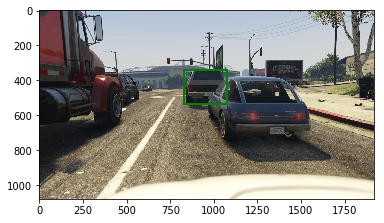

In [2]:
# Check original data
data_dir = '/media/yi/DATA/data-orig/VIPER/train'

img_name = os.path.join(data_dir, 'img/001/001_00301.jpg')
box_name = os.path.join(data_dir, 'bb/001/001_00301.csv')

box = []
with open(box_name) as csv_file:
    box_info = csv.reader(csv_file, delimiter=',')
    for row in box_info:
        box.append(row)
print(len(box))
box = np.array(box).astype(np.float)        

im = np.array(Image.open(img_name), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
a = box[1, 2:6]
box_area = (a[2] - a[0]) * (a[3] - a[1])
box_size = np.sqrt((a[2] - a[0]) * (a[3] - a[1]))
print(box_area)
print(box_size)
rect = patches.Rectangle((a[0], a[1]),a[2]-a[0],a[3]-a[1],linewidth=2,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# plt.show()

['24 967 380 1561 742\n', '24 831 339 1076 534\n', '27 1 1 483 659\n', '25 381 350 573 541\n']
[['24', '967', '380', '1561', '742'], ['24', '831', '339', '1076', '534'], ['27', '1', '1', '483', '659'], ['25', '381', '350', '573', '541']]
[[2.400e+01 9.670e+02 3.800e+02 1.561e+03 7.420e+02]
 [2.400e+01 8.310e+02 3.390e+02 1.076e+03 5.340e+02]
 [2.700e+01 1.000e+00 1.000e+00 4.830e+02 6.590e+02]
 [2.500e+01 3.810e+02 3.500e+02 5.730e+02 5.410e+02]]
215028.0
463.7111169683125


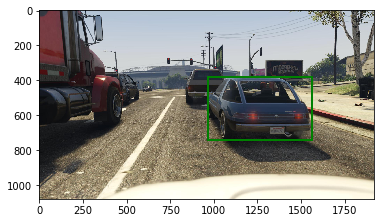

In [4]:
# Check data after filtering
img_name = os.path.join('/media/yi/DATA/data-orig/VIPER/train/img/001/001_00301.jpg')
box_name = os.path.join('/home/yi/code/few_shot/viper/train/bb/001/001_00301.txt')

box = []
with open(box_name) as txt_file:
    box_info = txt_file.readlines()
print(box_info)
for row in box_info:
    row = row.strip().split(' ')
    box.append(row)
print box
box = np.array(box).astype(np.float)        
print box

im = np.array(Image.open(img_name), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
a = box[0, 1:5]
box_area = (a[2] - a[0]) * (a[3] - a[1])
box_size = np.sqrt((a[2] - a[0]) * (a[3] - a[1]))
print(box_area)
print(box_size)
rect = patches.Rectangle((a[0], a[1]),a[2]-a[0],a[3]-a[1],linewidth=2,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# plt.show()

max flow: 1526.5001
flow range:
u = -1288.129 .. 1103.442
v = -65.945 .. 858.624


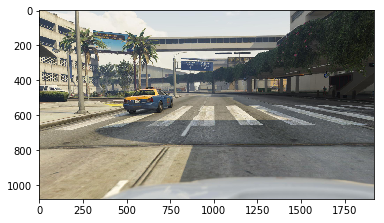

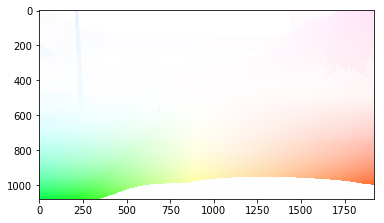

In [5]:
# Check optical flow data after filtering
from scipy.io import loadmat
import sys
sys.path.append('/home/yi/code/video_motion4/visualize/')
import flowlib

img_name = os.path.join('/media/yi/DATA/data-orig/VIPER/train/img/002/002_00187.jpg')
flow_name = os.path.join('/media/yi/DATA/data-orig/VIPER/train/flow/002/002_00187.mat')

im = np.array(Image.open(img_name), dtype=np.uint8)

flow = loadmat(flow_name)
flow = np.dstack((flow['u'], flow['v']))
# print flow
flow[np.isnan(flow)] = 0

optical_flow = flowlib.visualize_flow(flow)
optical_flow = optical_flow / 255.0
# print(optical_flow)

# Create figure and axes
fig,ax = plt.subplots(1)

ax.imshow(im)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(optical_flow)

# plt.show()